In [65]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [66]:
enwl_boundary = gpd.read_file("../data/boundary/enwl_dfes_local_authority_polygons.geojson")
enwl_ug_outages = gpd.read_file("../data/outages/ug-outage-flooding.geojson")
flood_history = gpd.read_file("../data/flood-history/Historic_Flood_Map.geojson")
flood_history.to_crs(enwl_boundary.crs, inplace=True)
flood_segment = gpd.overlay(flood_history, enwl_boundary, how="intersection")
geology = gpd.read_file("../data/soil/Soil_Parent_Material_V1_1km.gpkg")
geology = geology.to_crs(enwl_boundary.crs)
geology_within_boundary = gpd.overlay(geology, enwl_boundary, how='intersection')

/Users/neil/Documents/geospatial/geospatial-venv/lib/python3.13/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'Soil_Parent_Material_V1_1km.gpkg': 'Carbonate Content' (default), 'European Soil Bureau Description', 'Parent Material Grainsize', 'Soil_Depth', 'Soil Group', 'Soil Texture', 'layer_styles'. Specify layer parameter to avoid this warning.
  result = read_func(


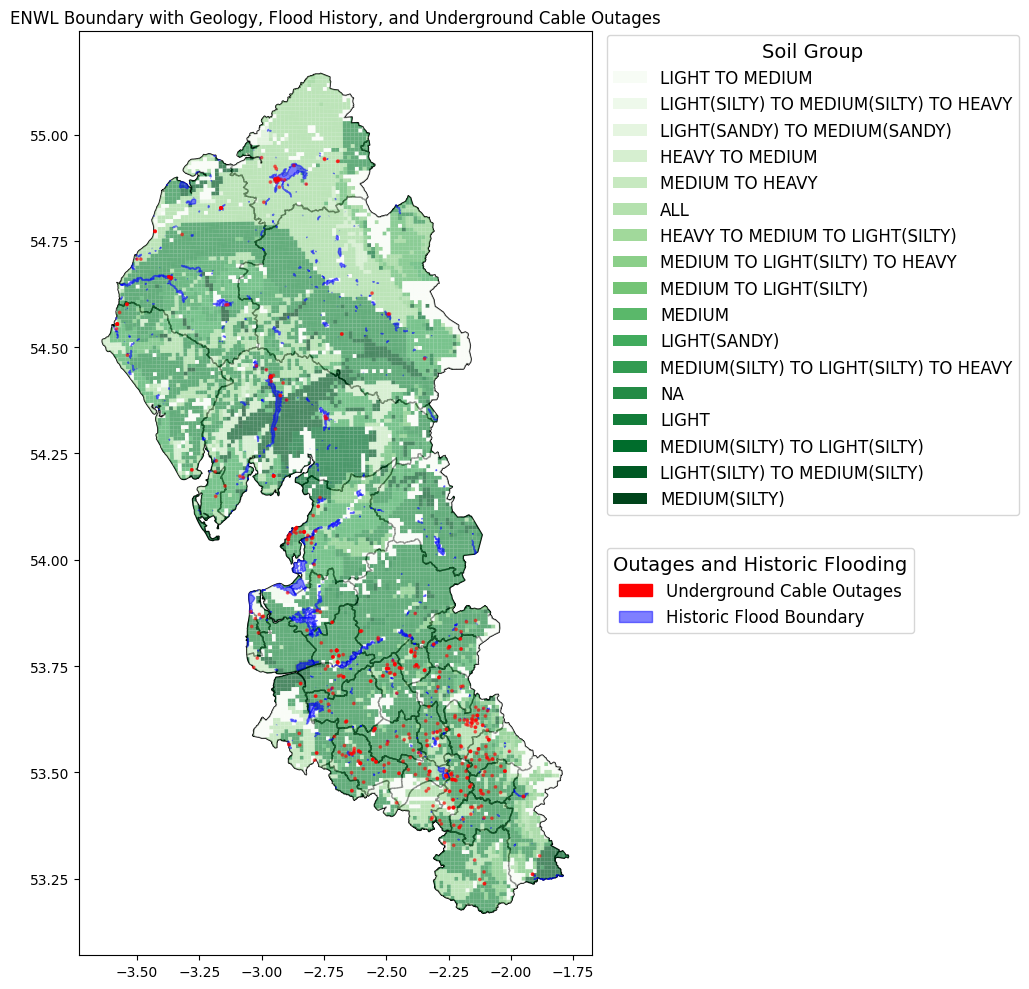

In [67]:
fig, ax = plt.subplots(figsize=(12, 10))
enwl_boundary.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1, label="ENWL Boundary")
geology_within_boundary.plot(ax=ax, column='SOIL_GROUP', cmap='Greens', legend=True, alpha=0.7)
flood_segment.plot(ax=ax, edgecolor='blue', facecolor='blue', linewidth=1, linestyle='-', label="Flood History Segment", alpha=0.5)
enwl_ug_outages.plot(ax=ax, edgecolor='red', facecolor='red', linewidth=1, linestyle='', label="UG Cables", markersize=3, alpha=0.5)

plt.title("ENWL Boundary with Geology, Flood History, and Underground Cable Outages")

soil_groups = geology_within_boundary['SOIL_GROUP'].unique()

cmap = plt.get_cmap('Greens', len(soil_groups))
color_lookup = {group: cmap(i % cmap.N) for i, group in enumerate(soil_groups)}

handles = [Patch(facecolor=color_lookup[group], label=group) for group in soil_groups]
legend1 = ax.legend(handles=handles, title="Soil Group", bbox_to_anchor=(1.0125, 1.005), loc='upper left', fontsize=12, title_fontsize=14)

extra_handles = [
    Patch(facecolor='red', edgecolor='red', label='Underground Cable Outages'),
    Patch(facecolor='blue', edgecolor='blue', alpha=0.5, label='Historic Flood Boundary')
]

legend2 = ax.legend(handles=extra_handles, title="Outages and Historic Flooding", bbox_to_anchor=(1.0125, 0.45), loc='upper left', fontsize=12, title_fontsize=14)
ax.add_artist(legend1)

plt.subplots_adjust(right=0.8)
plt.tight_layout(rect=[0, 0, 0.93, 1])
plt.show()

In [68]:
flood_history.head()

,objectid,layer,shape_length,shape_area,geometry
0,1,Historic Flood Map,None,None,"MULTIPOLYGON (((-6.29745 49.91207, -6.29733 49..."
1,2,Historic Flood Map,None,None,"MULTIPOLYGON (((-6.30346 49.9111, -6.3035 49.9..."
2,3,Historic Flood Map,None,None,"MULTIPOLYGON (((-6.30069 49.91235, -6.30067 49..."
3,4,Historic Flood Map,None,None,"MULTIPOLYGON (((-6.30218 49.91222, -6.30224 49..."
4,5,Historic Flood Map,None,None,"MULTIPOLYGON (((-6.31599 49.91389, -6.31562 49..."


In [69]:
enwl_ug_outages.head()

,incident_duration,exceptional_event_id,customer_affected,direct_cause_category,direct_cause,district_name,incident_date_time,restoration_date_time,exceptional_event_enddate,exceptional_event_start_date,main_equipment_involved_1,primary_substation,total_customer_minutes_lost,geometry
0,302,0,50.0,Weather and Environment,Flooding,Carlisle,2000-09-20 13:43:00+00:00,2000-09-20 18:45:00+00:00,NaT,NaT,Underground Main - PLCS (armoured or unarmoured),636397,6210,POINT (-2.99096 54.84109)
1,987,0,26.0,Weather and Environment,Flooding,Stockport,2006-03-09 05:23:00+00:00,2006-03-09 21:50:00+00:00,NaT,NaT,Underground Main - PLCS (armoured or unarmoured),331472,20004,POINT (-2.14516 53.29354)
2,60,0,1.0,Weather and Environment,Flooding,Manchester,2024-11-14 14:30:00+00:00,2024-11-14 15:30:00+00:00,NaT,NaT,Underground Service (metered) - Plastics insul...,166894,60,POINT (-2.21434 53.49032)
3,10,0,5.0,Weather and Environment,Flooding,Manchester,2025-01-01 13:30:00+00:00,2025-01-03 13:30:00+00:00,NaT,NaT,Underground Main - Consac,171943,50,POINT (-2.24904 53.41516)
4,56,31,13.0,Weather and Environment,Flooding,Manchester,2015-12-14 18:10:00+00:00,2015-12-14 19:06:00+00:00,2015-12-17 18:50:00+00:00,2015-12-04 19:20:00+00:00,Underground Main - Consac,171157,728,None


In [70]:
enwl_ug_outages['exceptional_event_id'].unique()

array(['0', '31', '32', '34'], dtype=object)

In [71]:
enwl_ug_outages.head()

,incident_duration,exceptional_event_id,customer_affected,direct_cause_category,direct_cause,district_name,incident_date_time,restoration_date_time,exceptional_event_enddate,exceptional_event_start_date,main_equipment_involved_1,primary_substation,total_customer_minutes_lost,geometry
0,302,0,50.0,Weather and Environment,Flooding,Carlisle,2000-09-20 13:43:00+00:00,2000-09-20 18:45:00+00:00,NaT,NaT,Underground Main - PLCS (armoured or unarmoured),636397,6210,POINT (-2.99096 54.84109)
1,987,0,26.0,Weather and Environment,Flooding,Stockport,2006-03-09 05:23:00+00:00,2006-03-09 21:50:00+00:00,NaT,NaT,Underground Main - PLCS (armoured or unarmoured),331472,20004,POINT (-2.14516 53.29354)
2,60,0,1.0,Weather and Environment,Flooding,Manchester,2024-11-14 14:30:00+00:00,2024-11-14 15:30:00+00:00,NaT,NaT,Underground Service (metered) - Plastics insul...,166894,60,POINT (-2.21434 53.49032)
3,10,0,5.0,Weather and Environment,Flooding,Manchester,2025-01-01 13:30:00+00:00,2025-01-03 13:30:00+00:00,NaT,NaT,Underground Main - Consac,171943,50,POINT (-2.24904 53.41516)
4,56,31,13.0,Weather and Environment,Flooding,Manchester,2015-12-14 18:10:00+00:00,2015-12-14 19:06:00+00:00,2015-12-17 18:50:00+00:00,2015-12-04 19:20:00+00:00,Underground Main - Consac,171157,728,None


In [72]:
geology.head()

,ESB_DESC,CARB_CNTNT,PMM_GRAIN,SOIL_GROUP,SOIL_TEX,SOIL_DEPTH,PMM1K_UID,VERSION,geometry
0,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_1,DPSPM_V1_1km,"MULTIPOLYGON (((-7.67352 56.82004, -7.67379 56..."
1,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_2,DPSPM_V1_1km,"MULTIPOLYGON (((-7.67216 56.8111, -7.67243 56...."
2,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_3,DPSPM_V1_1km,"MULTIPOLYGON (((-7.67081 56.80216, -7.67108 56..."
3,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_4,DPSPM_V1_1km,"MULTIPOLYGON (((-7.66945 56.79322, -7.66972 56..."
4,GNEISS,NONE,MEDIUM,LIGHT(SANDY),LOAM TO SANDY LOAM,INTERMEDIATE-SHALLOW,bgsn:SPMv1_1k_5,DPSPM_V1_1km,"MULTIPOLYGON (((-7.6681 56.78428, -7.66837 56...."


In [73]:
enwl_ug_outages.info()

enwl_ug_outages['exceptional_event_id'] = enwl_ug_outages['exceptional_event_id'].astype(int)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   incident_duration             494 non-null    int32              
 1   exceptional_event_id          494 non-null    object             
 2   customer_affected             494 non-null    float64            
 3   direct_cause_category         494 non-null    object             
 4   direct_cause                  494 non-null    object             
 5   district_name                 494 non-null    object             
 6   incident_date_time            494 non-null    datetime64[ms, UTC]
 7   restoration_date_time         494 non-null    datetime64[ms, UTC]
 8   exceptional_event_enddate     450 non-null    datetime64[ms, UTC]
 9   exceptional_event_start_date  450 non-null    datetime64[ms, UTC]
 10  main_equipment_involved_1     

In [74]:
enwl_ug_outages.head()

,incident_duration,exceptional_event_id,customer_affected,direct_cause_category,direct_cause,district_name,incident_date_time,restoration_date_time,exceptional_event_enddate,exceptional_event_start_date,main_equipment_involved_1,primary_substation,total_customer_minutes_lost,geometry
0,302,0,50.0,Weather and Environment,Flooding,Carlisle,2000-09-20 13:43:00+00:00,2000-09-20 18:45:00+00:00,NaT,NaT,Underground Main - PLCS (armoured or unarmoured),636397,6210,POINT (-2.99096 54.84109)
1,987,0,26.0,Weather and Environment,Flooding,Stockport,2006-03-09 05:23:00+00:00,2006-03-09 21:50:00+00:00,NaT,NaT,Underground Main - PLCS (armoured or unarmoured),331472,20004,POINT (-2.14516 53.29354)
2,60,0,1.0,Weather and Environment,Flooding,Manchester,2024-11-14 14:30:00+00:00,2024-11-14 15:30:00+00:00,NaT,NaT,Underground Service (metered) - Plastics insul...,166894,60,POINT (-2.21434 53.49032)
3,10,0,5.0,Weather and Environment,Flooding,Manchester,2025-01-01 13:30:00+00:00,2025-01-03 13:30:00+00:00,NaT,NaT,Underground Main - Consac,171943,50,POINT (-2.24904 53.41516)
4,56,31,13.0,Weather and Environment,Flooding,Manchester,2015-12-14 18:10:00+00:00,2015-12-14 19:06:00+00:00,2015-12-17 18:50:00+00:00,2015-12-04 19:20:00+00:00,Underground Main - Consac,171157,728,None


In [75]:
enwl_ug_outages["in_flood"] = enwl_ug_outages.intersects(flood_segment.union_all())

enwl_ug_outages["distance_to_flood"] = enwl_ug_outages.distance(flood_segment.union_all())

enwl_ug_outages["exceptional_event"] = (enwl_ug_outages["exceptional_event_id"] != 0).astype(int)

enwl_ug_outages = gpd.sjoin(enwl_ug_outages, geology[["SOIL_TEX", "geometry"]], how="left")
enwl_ug_outages.rename(columns={"SOIL_TEX": "soil_type"}, inplace=True)


/var/folders/0r/fyrm13815xg5dtcft5cgtlt00000gn/T/ipykernel_55508/3020411850.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  enwl_ug_outages["distance_to_flood"] = enwl_ug_outages.distance(flood_segment.union_all())


In [76]:
enwl_ug_outages.drop(columns=["index_right"], inplace=True)

enwl_ug_outages.head()

,incident_duration,exceptional_event_id,customer_affected,direct_cause_category,direct_cause,district_name,incident_date_time,restoration_date_time,exceptional_event_enddate,exceptional_event_start_date,main_equipment_involved_1,primary_substation,total_customer_minutes_lost,geometry,in_flood,distance_to_flood,exceptional_event,soil_type
0,302,0,50.0,Weather and Environment,Flooding,Carlisle,2000-09-20 13:43:00+00:00,2000-09-20 18:45:00+00:00,NaT,NaT,Underground Main - PLCS (armoured or unarmoured),636397,6210,POINT (-2.99096 54.84109),False,0.006067,0,SAND TO SANDY LOAM
1,987,0,26.0,Weather and Environment,Flooding,Stockport,2006-03-09 05:23:00+00:00,2006-03-09 21:50:00+00:00,NaT,NaT,Underground Main - PLCS (armoured or unarmoured),331472,20004,POINT (-2.14516 53.29354),False,0.005765,0,SAND TO SANDY LOAM
2,60,0,1.0,Weather and Environment,Flooding,Manchester,2024-11-14 14:30:00+00:00,2024-11-14 15:30:00+00:00,NaT,NaT,Underground Service (metered) - Plastics insul...,166894,60,POINT (-2.21434 53.49032),False,0.015802,0,LOAM TO CLAYEY LOAM
3,10,0,5.0,Weather and Environment,Flooding,Manchester,2025-01-01 13:30:00+00:00,2025-01-03 13:30:00+00:00,NaT,NaT,Underground Main - Consac,171943,50,POINT (-2.24904 53.41516),False,0.040871,0,CLAY TO SANDY LOAM
4,56,31,13.0,Weather and Environment,Flooding,Manchester,2015-12-14 18:10:00+00:00,2015-12-14 19:06:00+00:00,2015-12-17 18:50:00+00:00,2015-12-04 19:20:00+00:00,Underground Main - Consac,171157,728,None,False,NaN,1,NaN
